# Compare Democracy Indexes

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

## Load Democracy datasets

In [2]:
# Democracy
dichotomous_df = pd.read_csv('../datasets/processed/democracy/dichotomous/dichotomous-democracy-snapshot.csv', header=0)
freedom_world_df = pd.read_csv('../datasets/processed/democracy/freedom-world/freedom-world-snapshot.csv', header=0)
lied_df = pd.read_csv('../datasets/processed/democracy/lied/lied-snapshot.csv', header=0)
polity_df = pd.read_csv('../datasets/processed/democracy/polity/polity5-snapshot.csv', header=0)

Now I'll verify the columns on each dataset.



In [5]:
print(dichotomous_df.info())
print(freedom_world_df.info())
print(lied_df.info())
print(polity_df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso3                      191 non-null    object 
 1   country                   191 non-null    object 
 2   ccode                     191 non-null    int64  
 3   abbreviation              191 non-null    object 
 4   abbreviation_undp         191 non-null    object 
 5   democracy                 191 non-null    float64
 6   democracy_trans           191 non-null    int64  
 7   democracy_breakdowns      191 non-null    int64  
 8   democracy_duration        191 non-null    int64  
 9   democracy_omitteddata     191 non-null    int64  
 10  democracy_femalesuffrage  191 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 16.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 40 columns):
 #   Co

## Merge Datasets

Now I'll merge all the datasets in one using the "iso3" column as the key.

In [6]:
# Merge all the datasets and lose the countries that are missing in any of them.
merged_df = dichotomous_df.merge(freedom_world_df, on='iso3', how='inner', suffixes=('d_', 'f_'))
merged_df = merged_df.merge(lied_df, on='iso3', how='inner', suffixes=('', 'l_'))
merged_df = merged_df.merge(polity_df, on='iso3', how='inner', suffixes=('', 'p_'))

print(f"Countries in Dichotomous: {len(dichotomous_df)}")
print(f"Countries in Freedom world: {len(freedom_world_df)}")
print(f"Countries in Lied: {len(lied_df)}")
print(f"Countries in Polity: {len(polity_df)}")
print(f"Countries in all the datasets: {len(merged_df)}")



Countries in Dichotomous: 191
Countries in Freedom world: 195
Countries in Lied: 198
Countries in Polity: 161
Countries in all the datasets: 159


Polity5 is the most restrictive dataset and it's taking a lot of countries out of the merge.

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 86 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   iso3                               159 non-null    object 
 1   countryd_                          159 non-null    object 
 2   ccode                              159 non-null    int64  
 3   abbreviation                       159 non-null    object 
 4   abbreviation_undp                  159 non-null    object 
 5   democracy                          159 non-null    float64
 6   democracy_trans                    159 non-null    int64  
 7   democracy_breakdowns               159 non-null    int64  
 8   democracy_duration                 159 non-null    int64  
 9   democracy_omitteddata              159 non-null    int64  
 10  democracy_femalesuffrage           159 non-null    int64  
 11  countryf_                          159 non-null    object 

In [7]:
merged_df.head()

,iso3,countryd_,ccode,abbreviation,abbreviation_undp,democracy,democracy_trans,democracy_breakdowns,democracy_duration,democracy_omitteddata,...,exrec,parcomp,parreg,polcomp,polity,polity2,xconst,xrcomp,xropen,xrreg
0,USA,UNITED STATES OF AMERICA,2,USA,USA,1.0,0,0,206,1,...,8,3,2,7,8,8.0,7,3,4,3
1,CAN,CANADA,20,CAN,CAN,1.0,0,0,139,1,...,8,5,5,10,10,10.0,7,3,4,3
2,CUB,CUBA,40,CUB,CUB,0.0,0,2,53,0,...,3,1,4,1,-5,-5.0,4,1,4,2
3,HTI,HAITI,41,HTI,HAI,0.0,0,0,186,0,...,7,4,3,8,5,5.0,5,2,4,2
4,DOM,DOMINICAN REPUBLIC,42,DOM,DOM,1.0,0,0,40,1,...,8,4,3,8,7,7.0,6,3,4,3


I'll create a correlation matrix with a heatmap to see the correlation between the indexes on each dataset.

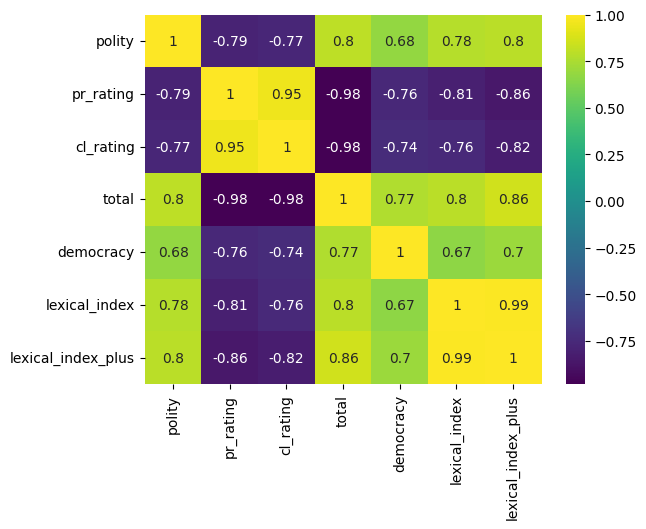

In [10]:
indexes = ["polity", "pr_rating", "cl_rating", "total", "democracy", "lexical_index", "lexical_index_plus"]
correlation_df = merged_df[indexes].copy()
sns.heatmap(correlation_df.corr(), cmap="viridis", annot = True)
plt.show()

In [11]:
correlation_df.head()

,polity,pr_rating,cl_rating,total,democracy,lexical_index,lexical_index_plus
0,8,2,2,84,1.0,6,7
1,10,1,1,97,1.0,6,7
2,-5,7,6,10,0.0,1,1
3,5,6,5,24,0.0,0,0
4,7,3,3,68,1.0,6,7


The indexes compared are:
- "polity": Polity5 index
- "total": Freedom in the World total score
- "democracy": Boolean indicator of democracy
- "lexical_index": Index of the LIED dataset
- "lexical_index_plus": Extension of the "lexical_index" score, which adds one point if the country has political liberties, to distinguish democracies from polyarchies

Each index follows a different scale and process to be defined, besides this, there is a correlation of about 0.8 between Polity5, Freedom in the World and the LIED indexes. Some calculate an average between results of a survey, others define a series of boolean variables and then sum up the results.

The "pr_rating" and "cl_rating" are scores of the Freedom in the World dataset. The are higher when the total score is lower, this is whi it's inversely correlated. The correlation between pr_rating, cr_rating and "total" is of -0.98 because the total is calculated using the same information.

The "democracy" correlation is a bit lower but this is expected given that it's a boolean variable.

I'll do a logistic regression to predict the democracy index using the other indexes.

In [13]:
y = correlation_df['democracy']
X = correlation_df.drop('democracy', axis=1)
X = sm.add_constant(X)

logit = sm.Logit(y, X)
results = logit.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.305593
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              democracy   No. Observations:                  159
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                            6
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.5555
Time:                        22:13:59   Log-Likelihood:                -48.589
converged:                       True   LL-Null:                       -109.30
Covariance Type:            nonrobust   LLR p-value:                 8.194e-24
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -7.1397      9.350     -0.764      0.445     -25.465      11.186
polit

As the predictors are highly correlated, all of them where chosen but not of them is very significant. I'll run the logistic regression again with L1 regularization to force some predictors to be zero.

In [15]:
logit_l1 = sm.Logit(y, X)
results_reg = logit_l1.fit_regularized(method='l1', alpha=1.0)

print(results_reg.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.311963710989762
            Iterations: 23
            Function evaluations: 29
            Gradient evaluations: 23
                           Logit Regression Results                           
Dep. Variable:              democracy   No. Observations:                  159
Model:                          Logit   Df Residuals:                      155
Method:                           MLE   Df Model:                            3
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.5524
Time:                        22:19:52   Log-Likelihood:                -48.919
converged:                       True   LL-Null:                       -109.30
Covariance Type:            nonrobust   LLR p-value:                 5.292e-26
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

The model p-value is low. The P-value of the "total" predictor is the lowest, so it could be considered the most significant to define if a country is democratic or not.

We're going to pay special attention to this one when doing correlation analysis.

Now I'll do a logistic regression but using the complete merged dataset, to see if we discover something new.

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 86 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   iso3                               159 non-null    object 
 1   countryd_                          159 non-null    object 
 2   ccode                              159 non-null    int64  
 3   abbreviation                       159 non-null    object 
 4   abbreviation_undp                  159 non-null    object 
 5   democracy                          159 non-null    float64
 6   democracy_trans                    159 non-null    int64  
 7   democracy_breakdowns               159 non-null    int64  
 8   democracy_duration                 159 non-null    int64  
 9   democracy_omitteddata              159 non-null    int64  
 10  democracy_femalesuffrage           159 non-null    int64  
 11  countryf_                          159 non-null    object 

In [37]:
logistic_regression_df = merged_df.copy()
y = logistic_regression_df['democracy']
columns_to_drop = ["iso3", "countryd_","abbreviation","abbreviation_undp","countryf_","status","countryn","country_iso","country_name","durable"]
X = logistic_regression_df.drop(columns=columns_to_drop)
X = sm.add_constant(X)

logit_l1 = sm.Logit(y, X)
results_reg = logit_l1.fit_regularized(method='l1', alpha=1.0)

print(results_reg.summary())

/Users/damian.calabresi/Studies/UMD/MSML 602 - Principles of Data Science/project/.venv/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/damian.calabresi/Studies/UMD/MSML 602 - Principles of Data Science/project/.venv/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.05911177412277453
            Iterations: 80
            Function evaluations: 95
            Gradient evaluations: 80
                           Logit Regression Results                           
Dep. Variable:              democracy   No. Observations:                  159
Model:                          Logit   Df Residuals:                      151
Method:                           MLE   Df Model:                            7
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.8313
Time:                        22:37:15   Log-Likelihood:                -18.434
converged:                       True   LL-Null:                       -109.30
Covariance Type:            nonrobust   LLR p-value:                 8.389e-36
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

This logistic regression with regularization takes everything into consideration, but we got the same results. The predictor "total" from the Freedom in the World dataset is the most important to predict a democracy.